# Style Transfer

In [39]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

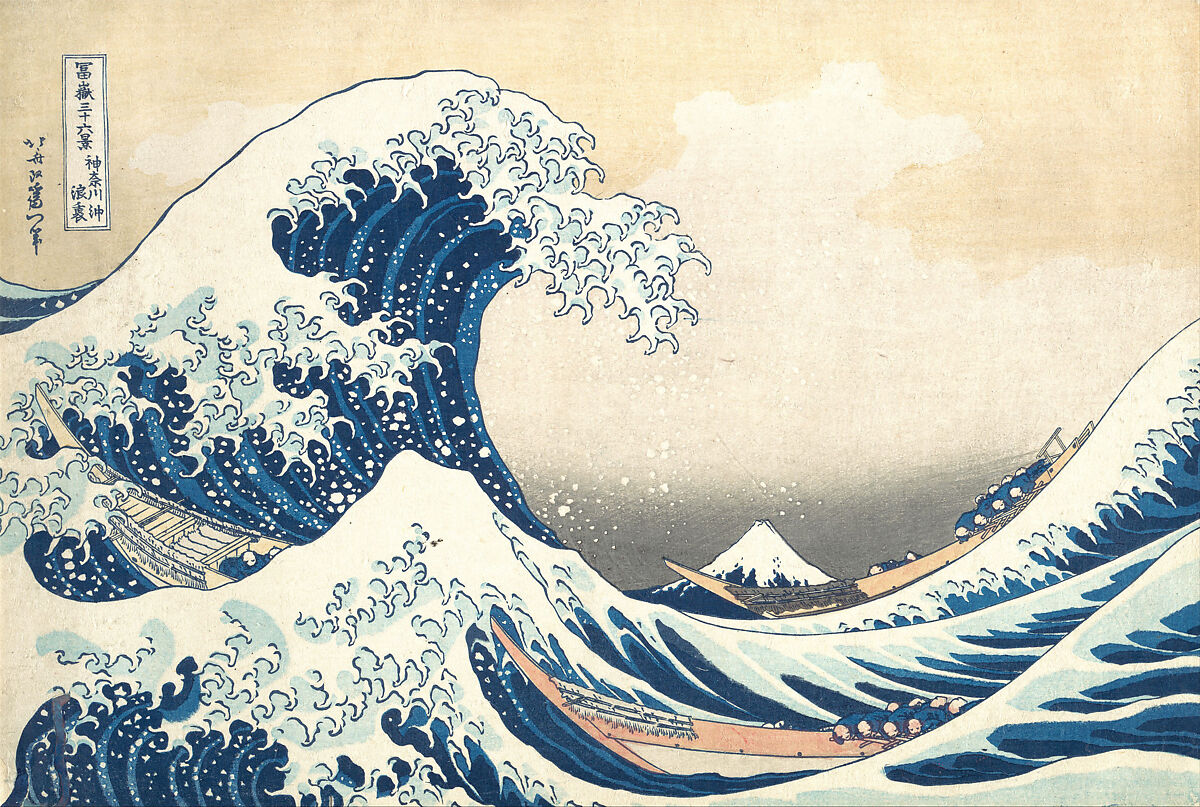

In [40]:
import IPython.display as display
import PIL.Image
import numpy as np

import requests
url = "https://collectionapi.metmuseum.org/api/collection/v1/iiif/45434/134438/main-image"
content_path = "Kanagawa.jpg"
req = requests.get(url, stream=True)
with open(content_path, "wb") as f:
  for chunk in req.iter_content():
    f.write(chunk)

content_image = PIL.Image.open(content_path)
content_image


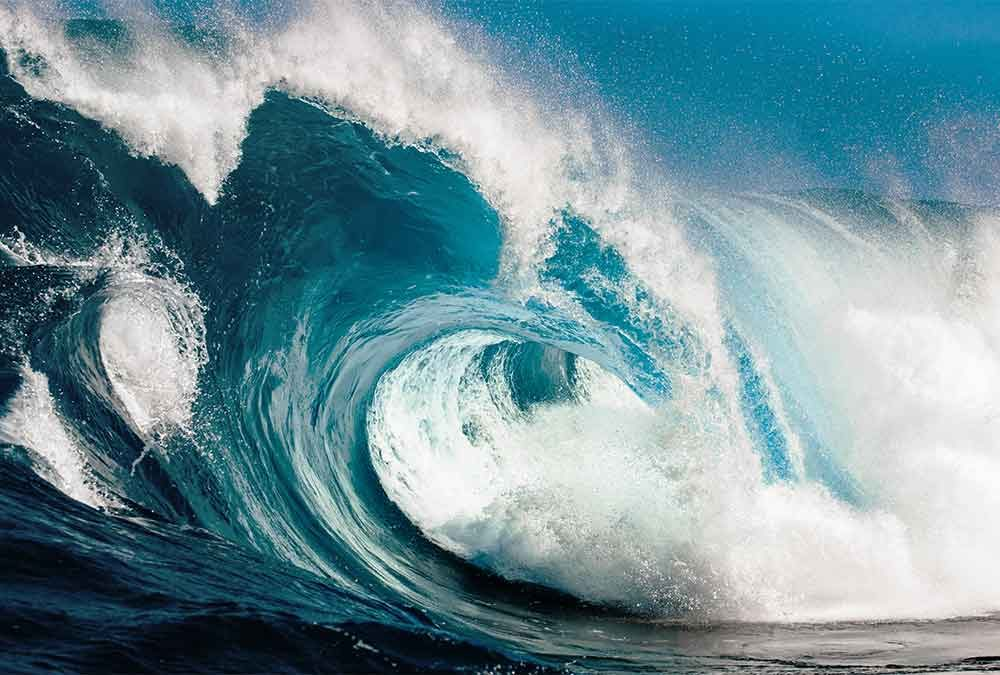

In [44]:
url = "https://www.malibumakos.com/wp-content/uploads/2018/07/ocean-waves-1000x675-1000x675.jpg"
style_path = "wave.jpg"
req = requests.get(url, stream=True)
with open(style_path, "wb") as f:
  for chunk in req.iter_content():
    f.write(chunk)

style_image = PIL.Image.open(style_path)
style_image

In [42]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

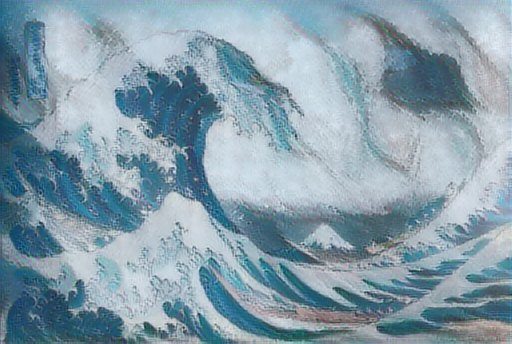

In [45]:
content_image = load_img(content_path)
style_image = load_img(style_path)

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)